### Import data table

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
provider_2015 = pd.read_csv('Medicare_Part_D_Opioid_Prescriber_Summary_File_2015.csv')
provider_2016 = pd.read_csv('Medicare_Part_D_Opioid_Prescriber_Summary_File_2016.csv')
provider_2017 = pd.read_csv('Medicare_Part_D_Opioid_Prescriber_Summary_File_2017.csv')

In [3]:
print('Medicare Part D Opioid Prescriber Dataset 2015 shape: {}'.format(provider_2015.shape))
print('Medicare Part D Opioid Prescriber Dataset 2016 shape: {}'.format(provider_2016.shape))
print('Medicare Part D Opioid Prescriber Dataset 2017 shape: {}'.format(provider_2017.shape))

Medicare Part D Opioid Prescriber Dataset 2015 shape: (1102253, 11)
Medicare Part D Opioid Prescriber Dataset 2016 shape: (1131550, 11)
Medicare Part D Opioid Prescriber Dataset 2017 shape: (1162898, 11)


In [4]:
provider_2015.sample(5)

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate
822662,1740410596,JAYAWARDENA,EROSHA,30312.0,GA,Internal Medicine,384,18.0,4.69,0.0,0.0
673204,1619025780,SENG,LOUIS,42066.0,KY,Internal Medicine,307,21.0,6.84,NaN,NaN
835284,1750596797,CAMPOS,WALDO,10036.0,NY,Pediatric Medicine,22,0.0,0.00,0.0,NaN
1011333,1912943614,ROMERO,JUAN,33014.0,FL,Physician Assistant,29,0.0,0.00,0.0,NaN
907221,1821086703,MAGHIDMAN,SAMUEL,33139.0,FL,Internal Medicine,113,0.0,0.00,0.0,NaN


In [5]:
provider_2016.sample(5)

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate
208129,1184674590,SMOTHERS,JASON,38261.0,TN,Optometry,228,0.0,0.00,0.0,NaN
519842,1457736902,KAHLON,ROOHI,48912.0,MI,Family Practice,196,26.0,13.27,NaN,NaN
104294,1093176810,SEO,ASHLEY,10003.0,NY,Nurse Practitioner,237,14.0,5.91,NaN,NaN
874101,1770568933,RUDISILE,MICHAEL,97504.0,OR,Family Practice,977,34.0,3.48,NaN,NaN
178568,1154671790,BELL,JEFFREY,60201.0,IL,Physician Assistant,139,47.0,33.81,0.0,0.0


In [6]:
provider_2017.sample(5)

,NPI,NPPES Provider Last Name,NPPES Provider First Name,NPPES Provider ZIP Code,NPPES Provider State,Specialty Description,Total Claim Count,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate
85138,1255396198,GOLDSTEIN,RICHARD,27536.0,NC,Otolaryngology,251,29.0,11.55,0.0,0.0
572468,1578548251,BRIZIUS,SCOTT,47714.0,IN,Optometry,310,0.0,0.00,0.0,NaN
849419,1225288293,BANGA,MADHUMITA,77521.0,TX,Family Practice,2679,72.0,2.69,NaN,NaN
820030,1659420586,FLAHARTY,NADINE,20852.0,MD,Certified Nurse Midwife,147,NaN,NaN,0.0,NaN
145383,1083886980,MILLER,NATHANIEL,55905.0,MN,Family Practice,2146,31.0,1.44,NaN,NaN


### Data Wrangling

In [7]:
# Rename the columns for further explore
provider_2015 = provider_2015.rename(columns={'NPPES Provider Last Name':'last_name', 
                                              'NPPES Provider First Name':'first_name',
                                  'NPPES Provider ZIP Code':'zip_code', 'NPPES Provider State':'state',
                                  'Specialty Description':'specialty', 'Total Claim Count':'claim_total',
                                  'Opioid Claim Count':'opioid_total', 'Opioid Prescribing Rate':'opioid_rate',
                                  'Long-Acting Opioid Claim Count':'la_opioid_count',
                                  'Long-Acting Opioid Prescribing Rate':'la_rate'})
provider_2016 = provider_2016.rename(columns={'NPPES Provider Last Name':'last_name', 
                                              'NPPES Provider First Name':'first_name',
                                  'NPPES Provider ZIP Code':'zip_code', 'NPPES Provider State':'state',
                                  'Specialty Description':'specialty', 'Total Claim Count':'claim_total',
                                  'Opioid Claim Count':'opioid_total', 'Opioid Prescribing Rate':'opioid_rate',
                                  'Long-Acting Opioid Claim Count':'la_opioid_count',
                                  'Long-Acting Opioid Prescribing Rate':'la_rate'})
provider_2017 = provider_2017.rename(columns={'NPPES Provider Last Name':'last_name', 
                                              'NPPES Provider First Name':'first_name',
                                  'NPPES Provider ZIP Code':'zip_code', 'NPPES Provider State':'state',
                                  'Specialty Description':'specialty', 'Total Claim Count':'claim_total',
                                  'Opioid Claim Count':'opioid_total', 'Opioid Prescribing Rate':'opioid_rate',
                                  'Long-Acting Opioid Claim Count':'la_opioid_count',
                                  'Long-Acting Opioid Prescribing Rate':'la_rate'})

In [8]:
# Drop last_name, first_name
provider_2015 = provider_2015.drop(columns = ['last_name', 'first_name'])
provider_2016 = provider_2016.drop(columns = ['last_name', 'first_name'])
provider_2017 = provider_2017.drop(columns = ['last_name', 'first_name'])

In [9]:
# Remove prescriber that cannot write opioid drugs
temp = provider_2015.groupby(['specialty']).opioid_total.sum().reset_index(name='sum')
temp = temp.loc[temp['sum'] == 0]
white_list_2015 = list(temp.specialty.unique())
provider_2015 = provider_2015[~provider_2015['specialty'].isin(white_list_2015)]

temp = provider_2016.groupby(['specialty']).opioid_total.sum().reset_index(name='sum')
temp = temp.loc[temp['sum'] == 0]
white_list_2016 = list(temp.specialty.unique())
provider_2016 = provider_2016[~provider_2016['specialty'].isin(white_list_2016)]

temp = provider_2017.groupby(['specialty']).opioid_total.sum().reset_index(name='sum')
temp = temp.loc[temp['sum'] == 0]
white_list_2017 = list(temp.specialty.unique())
provider_2017 = provider_2017[~provider_2017['specialty'].isin(white_list_2017)]

In [10]:
# Print out the white list length
print('Medicare 2015 white list length: {}'.format(len(white_list_2015)))
print('Medicare 2016 white list length: {}'.format(len(white_list_2016)))
print('Medicare 2017 white list length: {}'.format(len(white_list_2017)))

Medicare 2015 white list length: 73
Medicare 2016 white list length: 76
Medicare 2017 white list length: 82


In [11]:
# Print out the shape of data sets after first step cleaning
print('Medicare 2015 shape: {}'.format(provider_2015.shape))
print('Medicare 2016 shape: {}'.format(provider_2016.shape))
print('Medicare 2017 shape: {}'.format(provider_2017.shape))

Medicare 2015 shape: (1101912, 9)
Medicare 2016 shape: (1131235, 9)
Medicare 2017 shape: (1162185, 9)


In [12]:
# reformat all the specialy names
provider_2015['specialty'] = provider_2015.specialty.str.strip().str.lower()
top_10_2015 = provider_2015.specialty.value_counts().sort_values(ascending=False).head(10)
top_10_2015

internal medicine                                                 132428
dentist                                                           129181
nurse practitioner                                                122827
family practice                                                   108084
physician assistant                                                80642
student in an organized health care education/training program     47794
emergency medicine                                                 46176
obstetrics/gynecology                                              35814
optometry                                                          27746
psychiatry                                                         25668
Name: specialty, dtype: int64

In [13]:
provider_2016['specialty'] = provider_2016.specialty.str.strip().str.lower()
top_10_2016 = provider_2016.specialty.value_counts().sort_values(ascending=False).head(10)
top_10_2016

nurse practitioner                                                137822
internal medicine                                                 133174
dentist                                                           129650
family practice                                                   109334
physician assistant                                                86733
student in an organized health care education/training program     51615
emergency medicine                                                 47229
obstetrics & gynecology                                            29713
optometry                                                          28570
psychiatry                                                         25528
Name: specialty, dtype: int64

In [14]:
provider_2017['specialty'] = provider_2017.specialty.str.strip().str.lower()
top_10_2017 = provider_2017.specialty.value_counts().sort_values(ascending=False).head(10)
top_10_2017

nurse practitioner                                                153964
dentist                                                           130646
internal medicine                                                 130302
family practice                                                   110290
physician assistant                                                92495
student in an organized health care education/training program     53815
emergency medicine                                                 48475
obstetrics & gynecology                                            35496
optometry                                                          29460
psychiatry                                                         25413
Name: specialty, dtype: int64

In [15]:
#remove all characters that aren't digits
provider_2015['opioid_rate'] = provider_2015['opioid_rate'].replace('%','').astype('float64')
provider_2015['la_rate'] = provider_2015['la_rate'].replace('%','').astype('float64')

provider_2016['opioid_rate'] = provider_2016['opioid_rate'].replace('%','').astype('float64')
provider_2016['la_rate'] = provider_2016['la_rate'].replace('%','').astype('float64')

provider_2017['opioid_rate'] = provider_2017['opioid_rate'].replace('%','').astype('float64')
provider_2017['la_rate'] = provider_2017['la_rate'].replace('%','').astype('float64')

### Create graphs

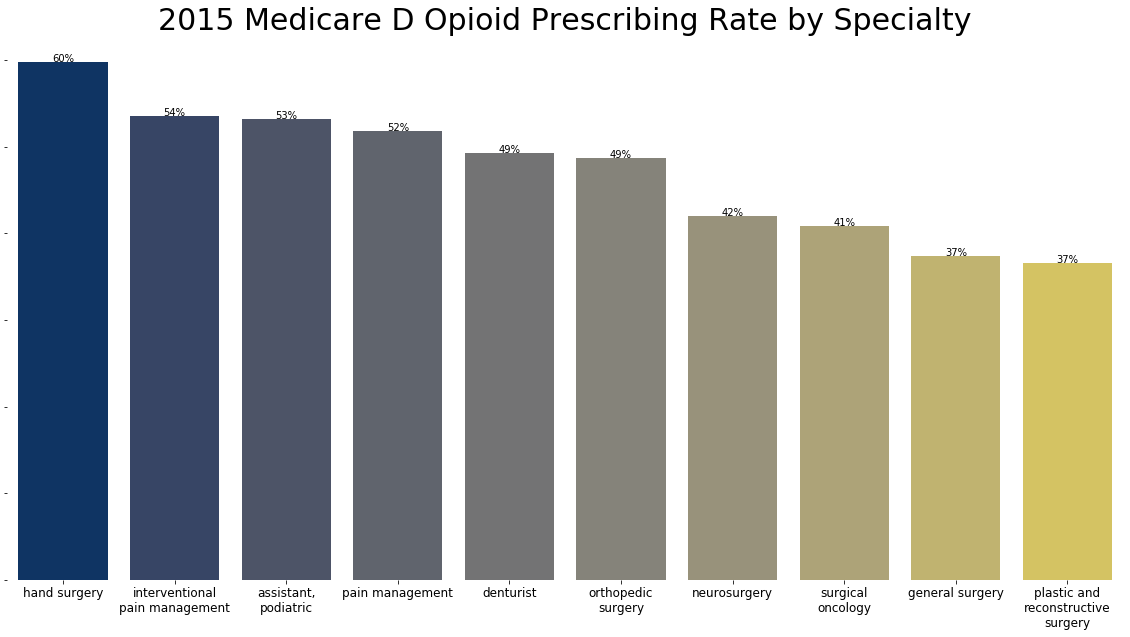

In [22]:
# 2015
specialty_2015 = provider_2015.groupby('specialty')['opioid_rate'].mean()
specialty_2015 = pd.DataFrame(data=specialty_2015).reset_index()
plot_data_2015 = specialty_2015.sort_values('opioid_rate', ascending=False).head(10)

fig, ax = plt.subplots(figsize=[20,10])
g = sns.barplot(x=plot_data_2015.specialty, y=plot_data_2015.opioid_rate, palette='cividis', linewidth=1)

plt.xlabel('')

tick_lab = ['hand surgery', 'interventional pain management', 'assistant, podiatric', 
            'pain management', 'denturist', 'orthopedic surgery', 'neurosurgery',
           'surgical oncology', 'general surgery', 'plastic and reconstructive surgery']

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, (value + '%'), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

from textwrap import wrap
tick_lab = [ '\n'.join(wrap(l, 16)) for l in tick_lab ]

g.set_xticklabels(tick_lab)
plt.ylabel('')
g.set_yticklabels([])

sns.despine(left=True, bottom=True)

# We change the fontsize of minor ticks label 
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.title('2015 Medicare D Opioid Prescribing Rate by Specialty', fontsize=30)
plt.show(g);

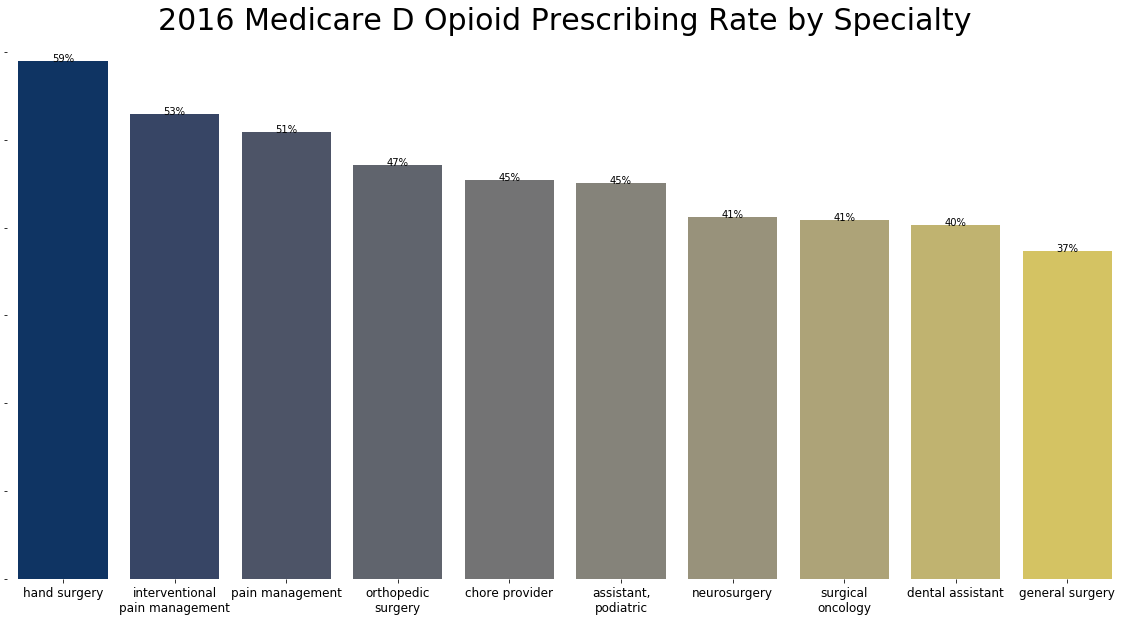

In [23]:
# 2016
specialty_2016 = provider_2016.groupby('specialty')['opioid_rate'].mean()
specialty_2016 = pd.DataFrame(data=specialty_2016).reset_index()
plot_data_2016 = specialty_2016.sort_values('opioid_rate', ascending=False).head(10)

fig, ax = plt.subplots(figsize=[20,10])
g = sns.barplot(x=plot_data_2016.specialty, y=plot_data_2016.opioid_rate, palette='cividis', linewidth=1)

plt.xlabel('')

tick_lab = ['hand surgery', 'interventional pain management', 'pain management', 
            'orthopedic surgery', 'chore provider', 'assistant, podiatric', 'neurosurgery',
           'surgical oncology', 'dental assistant', 'general surgery']

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, (value + '%'), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

from textwrap import wrap
tick_lab = [ '\n'.join(wrap(l, 16)) for l in tick_lab ]

g.set_xticklabels(tick_lab)
plt.ylabel('')
g.set_yticklabels([])

sns.despine(left=True, bottom=True)

# We change the fontsize of minor ticks label 
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.title('2016 Medicare D Opioid Prescribing Rate by Specialty', fontsize=30)
plt.show(g);

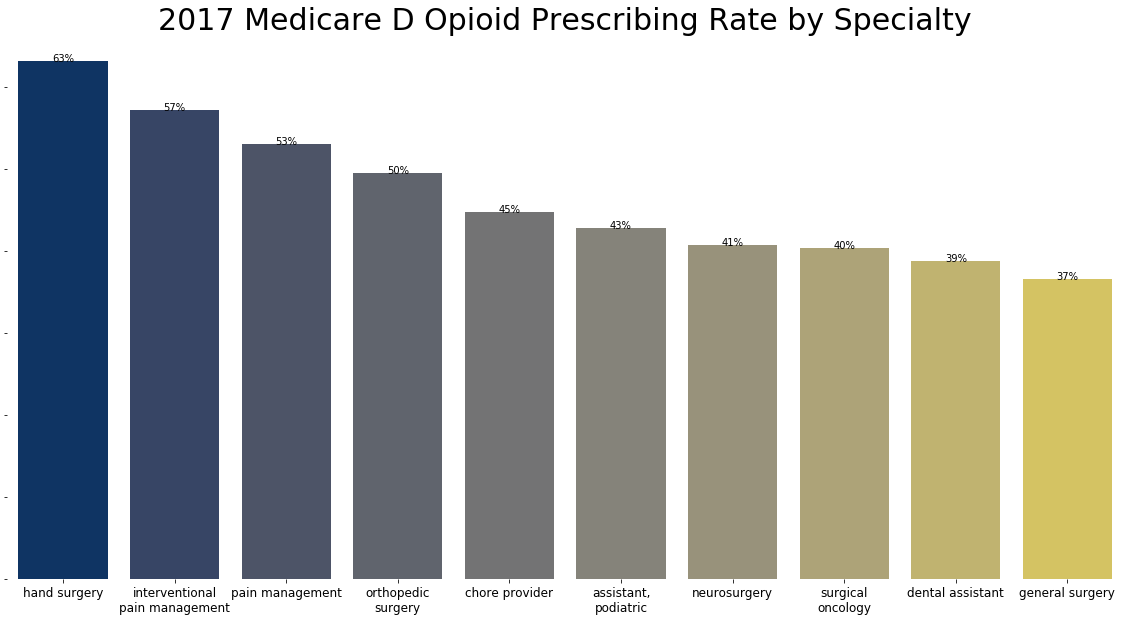

In [34]:
# 2017
specialty_2017 = provider_2017.groupby('specialty')['opioid_rate'].mean()
specialty_2017 = pd.DataFrame(data=specialty_2017).reset_index()
plot_data_2017 = specialty_2017.sort_values('opioid_rate', ascending=False).head(10)

fig, ax = plt.subplots(figsize=[20,10])
g = sns.barplot(x=plot_data_2017.specialty, y=plot_data_2017.opioid_rate, palette='cividis', linewidth=1)

plt.xlabel('')

tick_lab = ['hand surgery', 'interventional pain management', 'pain management', 
            'orthopedic surgery', 'chore provider', 'assistant, podiatric', 'neurosurgery',
           'surgical oncology', 'dental assistant', 'general surgery']

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, (value + '%'), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

from textwrap import wrap
tick_lab = [ '\n'.join(wrap(l, 16)) for l in tick_lab ]

g.set_xticklabels(tick_lab)
plt.ylabel('')
g.set_yticklabels([])

sns.despine(left=True, bottom=True)

# We change the fontsize of minor ticks label 
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.title('2017 Medicare D Opioid Prescribing Rate by Specialty', fontsize=30)
plt.show(g);

### Frequently Appeared States

In [31]:
state_2015 = provider_2015['opioid_total'].groupby(provider_2015['state'])
state_2015.describe().sort_values(by = ['mean'], ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AL,10563.0,205.578245,654.683339,0.0,0.0,27.0,124.00,22627.0
AR,6278.0,180.098598,541.061550,0.0,0.0,35.0,131.00,18606.0
MS,6554.0,164.892127,500.588003,0.0,0.0,34.0,122.75,18086.0
TN,17678.0,164.712467,423.371713,0.0,0.0,33.0,123.00,8808.0
OK,8542.0,149.940646,507.256660,0.0,0.0,26.0,92.00,17390.0
KY,11689.0,145.797587,512.653847,0.0,0.0,18.0,87.00,15163.0
WV,5204.0,143.574750,441.603241,0.0,0.0,22.0,89.00,10625.0
SC,10767.0,142.157147,403.861522,0.0,0.0,31.0,110.00,8740.0
GA,19601.0,140.239733,486.121912,0.0,0.0,25.0,93.00,13661.0


In [32]:
state_2016 = provider_2016['opioid_total'].groupby(provider_2016['state'])
state_2016.describe().sort_values(by = ['mean'], ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AL,10945.0,196.277935,659.752942,0.0,0.0,23.0,115.0,21767.0
AR,6562.0,175.618409,542.642967,0.0,0.0,34.0,124.0,17736.0
MS,6725.0,162.249517,504.796420,0.0,0.0,32.0,118.0,16456.0
TN,18071.0,158.640418,411.372381,0.0,0.0,32.0,116.0,8408.0
OK,8697.0,148.065770,512.021067,0.0,0.0,24.0,86.0,15462.0
KY,12289.0,137.735780,502.373955,0.0,0.0,17.0,79.0,15823.0
SC,11171.0,137.332110,414.280606,0.0,0.0,28.0,98.0,9791.0
GA,20470.0,136.467367,499.486138,0.0,0.0,23.0,85.0,15350.0
IN,15427.0,133.255656,384.405853,0.0,0.0,28.0,105.0,12873.0


In [33]:
state_2017 = provider_2017['opioid_total'].groupby(provider_2017['state'])
state_2017.describe().sort_values(by = ['mean'], ascending = False).head(10)

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AL,11362.0,179.792730,632.941732,0.0,0.0,20.0,101.00,14447.0
AR,6796.0,165.494408,505.121873,0.0,0.0,31.0,115.00,12167.0
MS,6839.0,150.272993,483.605085,0.0,0.0,29.0,104.00,15533.0
TN,18422.0,147.709044,398.907985,0.0,0.0,28.0,105.00,9284.0
OK,8857.0,141.731286,501.651545,0.0,0.0,22.0,81.00,12982.0
KY,12693.0,129.141732,519.377423,0.0,0.0,14.0,71.00,20599.0
GA,21409.0,128.836377,507.321854,0.0,0.0,20.0,75.00,15794.0
SC,11500.0,127.989913,405.071446,0.0,0.0,24.0,89.00,10394.0
XX,8.0,127.000000,198.487855,0.0,0.0,13.5,181.25,528.0
